# CHAPTER 1 — Introduction: The Urban Scientist's Mission

## Cities of Tomorrow: Why this notebook exists

The **Fabric Data Days – Notebooks Contest: Cities of Tomorrow** invites us to use Data Science notebooks to understand how cities grow, transform, and try to balance **urban development** with **environmental sustainability**.

The official challenge brief is clear: given a dataset about sustainable urban planning and landscape, we must explore, model, and tell a data-informed story about **"Cities of Tomorrow – Urban Growth & Sustainability"**.

---

## My role on this journey: the Urban Scientist

In this notebook I act as an **urban scientist**: someone who uses data to answer a single, decisive question:

> **How can cities grow without sacrificing quality of life and the environment?**

Throughout the following chapters I will:
- **Observe** how different cities behave regarding green areas, urban density, transport, clean energy, pollution and livability;
- **Measure** the balance (or imbalance) between urban growth and sustainability;
- **Propose** a compact index — a synthetic score to help compare "Cities of Tomorrow" at a glance.

---

## Where do the data come from?

This notebook starts from the main dataset:

- **Sustainable Urban Planning & Landscape Dataset (Kaggle)**  
  It contains variables such as:  
  `Green Area %`, `Urban Density`, `Transport Infrastructure Score`,  
  `Renewable Energy Index`, `Pollution Index`, `Livability Index`.

Optionally, the analysis can be enriched with:
- World Bank indicators (urbanization, population growth, etc.);
- UN-Habitat metrics (housing, urban services, inequality, etc.).

These additional sources will be used to:
- **Create our own indices** (for example, a Sustainable Balance Index);
- **Compare** what official indicators say with what our statistical model learns.

---

## Notebook objectives

This notebook has three main objectives:

1. **Explore** urban data
   - Data cleaning and handling missing values;
   - Understand distributions of key variables;
   - Identify patterns, correlations and city clusters.

2. **Model** the future of cities
   - Fit predictive models (e.g., regression or tree methods) to estimate an urban sustainability score;
   - Measure which factors most contribute to a city being more sustainable and livable.

3. **Tell an actionable story** for decision makers
   - Translate technical findings into accessible language for public managers, urban planners and the broader community;
   - Connect each visualization and metric to policy recommendations.

---

## Notebook structure

This notebook is organized into chapters covering the full analytical journey:

1. Chapter 1 — Introduction
2. Chapter 2 — Getting to know the Cities of Tomorrow (EDA)
3. Chapter 3 — Advanced diagnosis: the city's pulse
4. Chapter 4 — Predictive modeling: revealing the critical factor
5. Chapter 5 — Predictive modeling: which factors explain urban sustainability
6. Chapter 6 — Global context: WDI and UN-Habitat indicators
7. Chapter 7 — Modeling and explainability (SHAP)
8. Chapter 8 — Clustering the Cities of Tomorrow
9. Chapter 9 — Final model evaluation and scenarios
10. Chapter 10 — Final predictive modeling, comparison and explainability
11. Chapter 11 — Integrated conclusion, decision framework and technical appendix

---

> **Mission:** Use the urban scientist's lens to turn data into **actionable insights** about making cities greener, fairer and more livable.

# CHAPTER 2 — Getting to Know the Cities of Tomorrow
### Loading the data that will guide our investigation

We now start the field work — analyzing variables that describe the **real-life cities**: their green areas, density, mobility, energy, pollution and livability.

In this first stage of the chapter we will:

- Load the main dataset
- Inspect the first rows
- Check column formats
- Identify possible inconsistencies or missing values

In [ ]:
import pandas as pd

df = pd.read_csv('datasets/urban_planning_dataset.csv')
df.head()


,building_density,road_connectivity,public_transport_access,air_quality_index,green_cover_percentage,carbon_footprint,population_density,crime_rate,avg_income,renewable_energy_usage,disaster_risk_index,land_use_type_Commercial,land_use_type_Green Space,land_use_type_Industrial,land_use_type_Residential,urban_sustainability_score
0,0.367915,0.393821,0.428129,0.414830,0.238555,0.921950,0.126449,0.547160,0.932412,0.382358,0.446242,0.0,0.0,1.0,0.0,0.259239
1,0.414306,0.608445,0.658481,0.490982,0.917681,0.178213,0.325124,0.764042,0.903241,0.377167,0.936824,0.0,1.0,0.0,0.0,0.576923
2,0.827902,0.444679,0.263853,0.264529,0.077883,0.295159,0.042150,0.575736,0.208098,0.237949,0.463054,0.0,0.0,0.0,1.0,0.252844
3,0.733936,0.742708,0.012022,0.486974,0.427303,0.975900,0.663838,0.826727,0.258951,0.876539,0.204293,0.0,0.0,1.0,0.0,0.409002
4,0.769643,0.228268,0.519082,0.945892,0.532321,0.370856,0.429912,0.127542,0.180394,0.679006,0.151421,0.0,0.0,1.0,0.0,0.686376


In [ ]:
df.info()
df.describe()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476 entries, 0 to 3475
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   building_density            3476 non-null   float64
 1   road_connectivity           3476 non-null   float64
 2   public_transport_access     3476 non-null   float64
 3   air_quality_index           3476 non-null   float64
 4   green_cover_percentage      3476 non-null   float64
 5   carbon_footprint            3476 non-null   float64
 6   population_density          3476 non-null   float64
 7   crime_rate                  3476 non-null   float64
 8   avg_income                  3476 non-null   float64
 9   renewable_energy_usage      3476 non-null   float64
 10  disaster_risk_index         3476 non-null   float64
 11  land_use_type_Commercial    3476 non-null   float64
 12  land_use_type_Green Space   3476 non-null   float64
 13  land_use_type_Industrial    3476 

building_density              0
road_connectivity             0
public_transport_access       0
air_quality_index             0
green_cover_percentage        0
carbon_footprint              0
population_density            0
crime_rate                    0
avg_income                    0
renewable_energy_usage        0
disaster_risk_index           0
land_use_type_Commercial      0
land_use_type_Green Space     0
land_use_type_Industrial      0
land_use_type_Residential     0
urban_sustainability_score    0
dtype: int64

## Diagnóstico Inicial do Dataset

- **Registros:** 3.476  
- **Colunas:** 16  
- **Valores ausentes:** 0  
- **Tipos:** todas as colunas são numéricas  
- **Normalização:** variáveis entre 0 e 1  

Esses resultados mostram que o dataset está limpo, consistente e pronto para análise.

Com esse diagnóstico inicial das cidades do desafio, avançamos no **Capítulo 3** para investigar relações estatísticas mais profundas entre os indicadores.


# CAPÍTULO 2.1 — Análise Inicial do Território  
### EDA Inicial: Mapeando os Padrões Fundamentais das Cidades


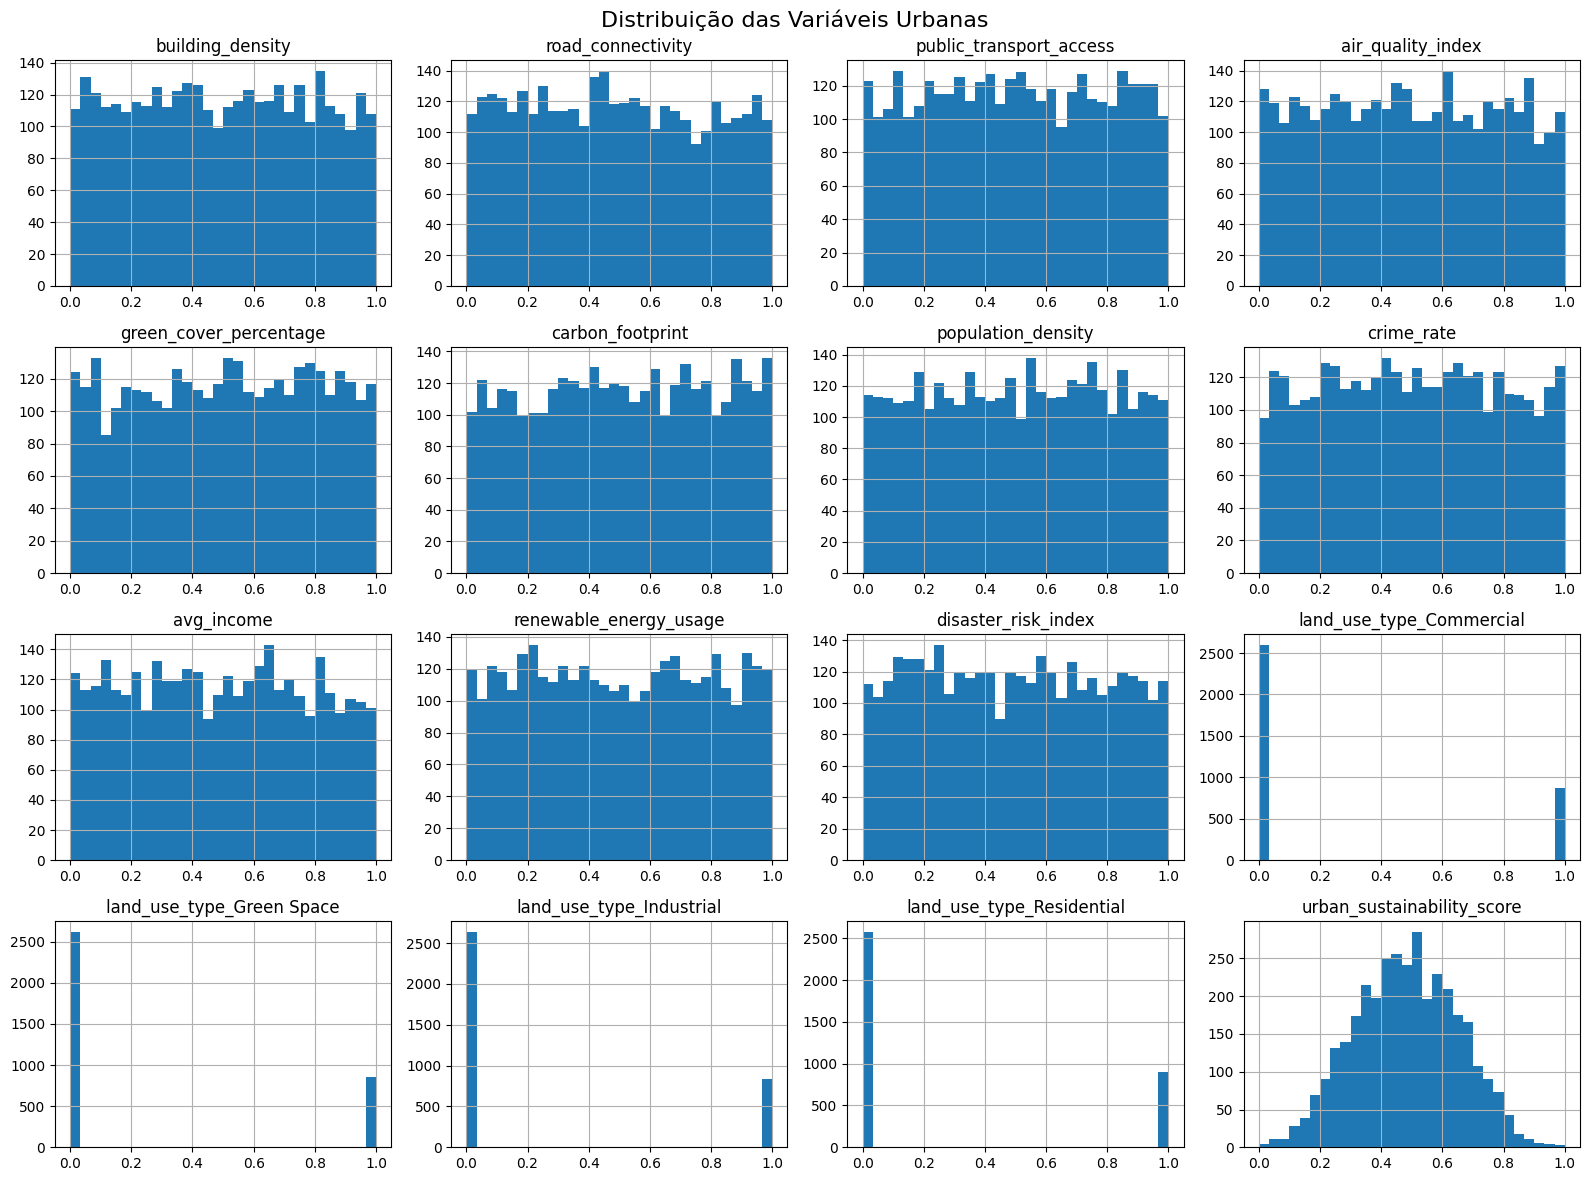

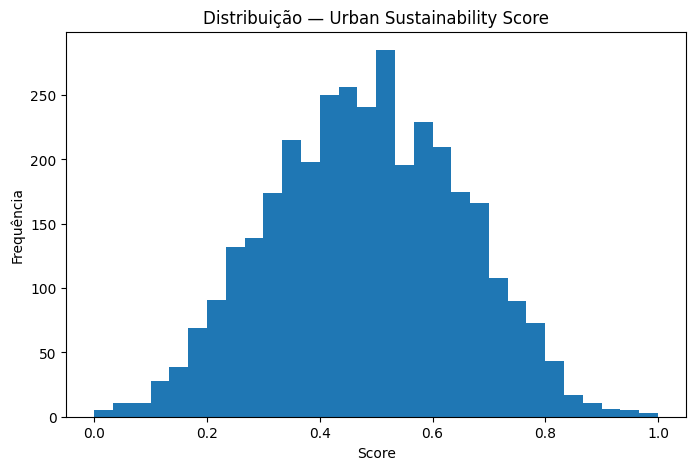

In [ ]:
import matplotlib.pyplot as plt

# Histograms
"""Plot distributions of the main numerical variables to inspect their shapes."""
df.hist(figsize=(16, 12), bins=30)
plt.suptitle("Distribution of Urban Variables", fontsize=16)
plt.tight_layout()
plt.show()

# Sustainability score distribution
plt.figure(figsize=(8, 5))
plt.hist(df['urban_sustainability_score'], bins=30)
plt.title("Distribution — Urban Sustainability Score")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

## Correlações entre Indicadores Urbanos

Nesta etapa, observamos como as variáveis se relacionam entre si e com o score final:

- Áreas verdes e energia renovável puxam a cidade para cima  
- Emissões de carbono e risco de desastres puxam para baixo  
- Transporte público tem impacto positivo moderado  
- Uso do solo tem influência baixa isoladamente


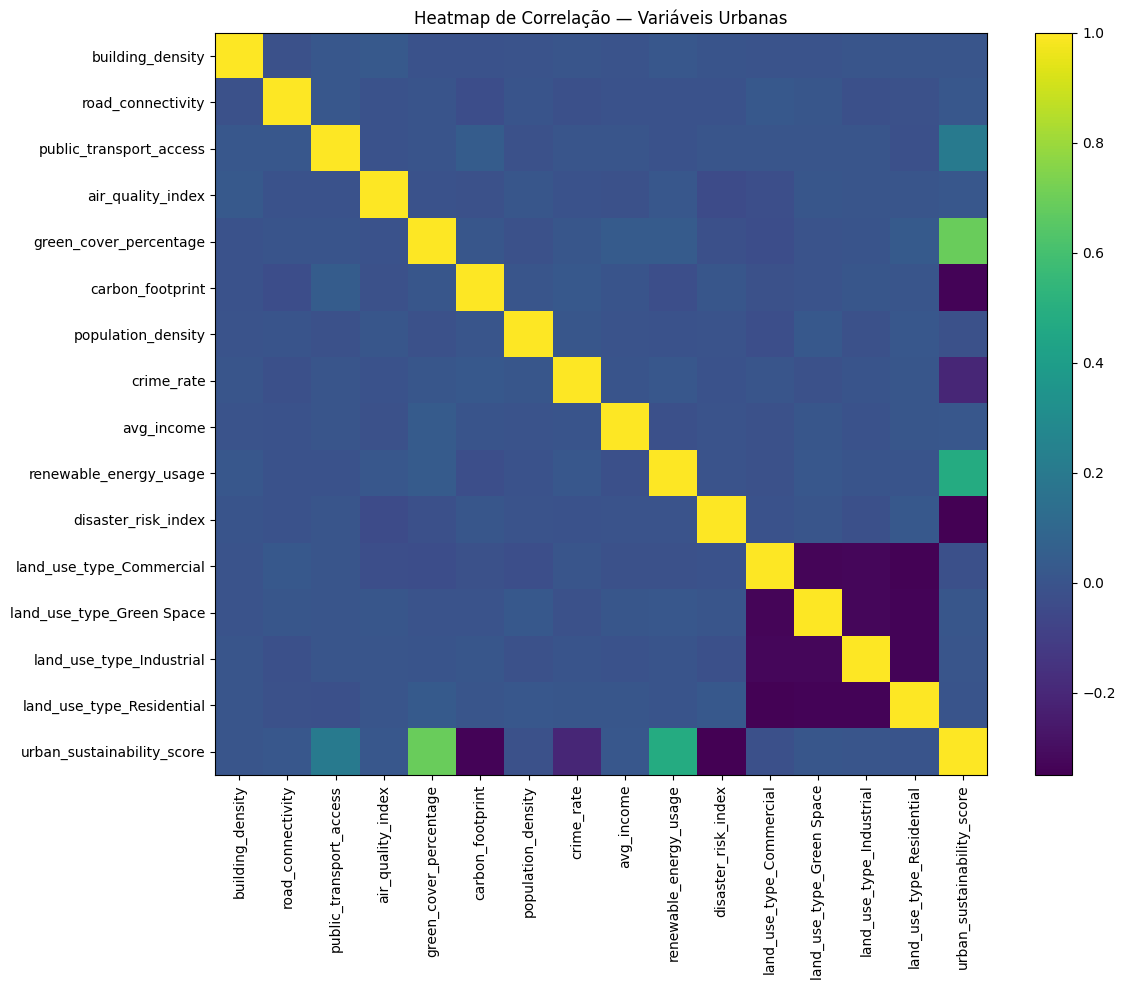

In [ ]:
corr = df.corr()

import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap — Urban Variables")
plt.tight_layout()
plt.show()

# CAPÍTULO 2 — Conclusão: O Que Revelam os Primeiros Mapas das Cidades

Com as primeiras análises, três descobertas se destacam:

1. **Áreas verdes são o maior pilar da sustentabilidade urbana**  
2. **Energia limpa é o segundo fator mais determinante**  
3. **Carbono e vulnerabilidade climática são os maiores obstáculos**

Essas evidências guiarão o início do CAPÍTULO 3, onde vamos:

- Analisar padrões profundos  
- Comparar cidades  
- Identificar grupos (clusters)  
- Detectar exceções e desigualdades

> **Se no Capítulo 2 mapeamos o terreno, no Capítulo 3 começaremos a caminhar por ele.**


# Capítulo 3 — Diagnóstico Avançado: O Pulso das Cidades  

No capítulo anterior, exploramos a paisagem geral dos dados. Agora avançamos para uma etapa crucial:  
descobrir **quais forças realmente moldam a sustentabilidade urbana**.

A partir da matriz de correlação e das estatísticas avançadas, analisamos como os indicadores se relacionam entre si e com o índice final de sustentabilidade — revelando padrões, tensões e alavancas.

Este capítulo atende às diretrizes do concurso Fabric Data Days, que pedem:

- Exploração estatística sólida  
- Correlações explicadas  
- Análises narrativas em Markdown  
- Clareza na interpretação  

Vamos investigar o **pulso real** das cidades do dataset.


,count,mean,std,min,5%,25%,50%,75%,95%,max
building_density,3476.0,0.496345,0.287770,0.0,0.050621,0.249740,0.495439,0.745671,0.949473,1.0
road_connectivity,3476.0,0.490205,0.287484,0.0,0.051348,0.241686,0.483176,0.734190,0.947656,1.0
public_transport_access,3476.0,0.501397,0.287163,0.0,0.047907,0.256093,0.499168,0.752051,0.945279,1.0
air_quality_index,3476.0,0.494445,0.287185,0.0,0.046092,0.246493,0.488978,0.745491,0.947896,1.0
green_cover_percentage,3476.0,0.505579,0.288395,0.0,0.046079,0.256761,0.513606,0.757637,0.948462,1.0
carbon_footprint,3476.0,0.509657,0.288139,0.0,0.055262,0.269287,0.507030,0.755210,0.955031,1.0
population_density,3476.0,0.502158,0.286912,0.0,0.050531,0.254415,0.505622,0.750379,0.946916,1.0
crime_rate,3476.0,0.499659,0.284553,0.0,0.056824,0.255697,0.499045,0.739293,0.952198,1.0
avg_income,3476.0,0.491556,0.285484,0.0,0.047488,0.242244,0.496457,0.730656,0.943824,1.0
renewable_energy_usage,3476.0,0.499881,0.290146,0.0,0.052671,0.245107,0.498264,0.752263,0.951812,1.0


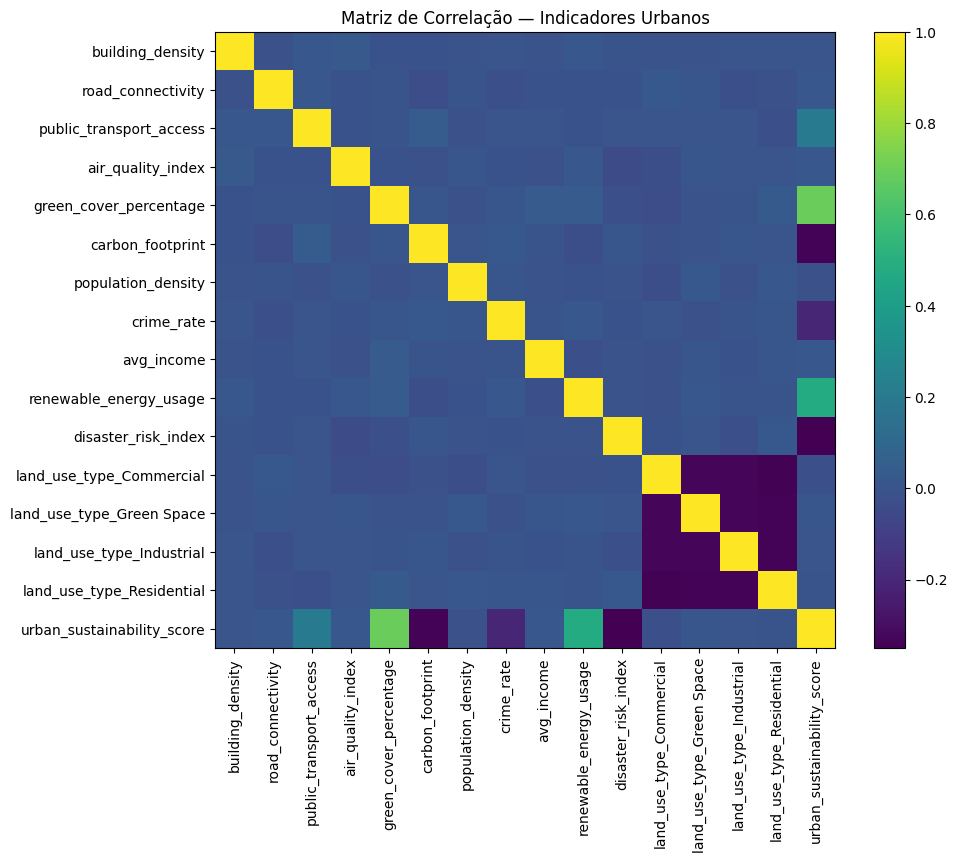

,coluna,outliers (%)
building_density,building_density,0.00
road_connectivity,road_connectivity,0.00
public_transport_access,public_transport_access,0.00
air_quality_index,air_quality_index,0.00
green_cover_percentage,green_cover_percentage,0.00
carbon_footprint,carbon_footprint,0.00
population_density,population_density,0.00
crime_rate,crime_rate,0.00
avg_income,avg_income,0.00
renewable_energy_usage,renewable_energy_usage,0.00


urban_sustainability_score    1.000000
green_cover_percentage        0.690025
renewable_energy_usage        0.481232
public_transport_access       0.203036
air_quality_index             0.018695
avg_income                    0.018001
road_connectivity             0.016109
land_use_type_Green Space     0.008978
building_density              0.005958
land_use_type_Industrial      0.005715
land_use_type_Residential     0.003102
population_density           -0.017371
land_use_type_Commercial     -0.017677
crime_rate                   -0.207367
carbon_footprint             -0.337701
disaster_risk_index          -0.349746
Name: urban_sustainability_score, dtype: float64

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load dataset
df = pd.read_csv("datasets/urban_planning_dataset.csv")

# 2. Select numeric columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

# 3. Advanced statistics
stats_df = df[num_cols].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]).T
display(stats_df)

# 4. Correlation matrix
corr = df[num_cols].corr()

# 5. Heatmap via matplotlib (per environment rules)
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.imshow(corr, aspect='auto')
ax.set_xticks(range(len(num_cols)))
ax.set_yticks(range(len(num_cols)))
ax.set_xticklabels(num_cols, rotation=90)
ax.set_yticklabels(num_cols)
ax.set_title("Correlation Matrix — Urban Indicators")
fig.colorbar(cax)
plt.show()

# 6. Outliers (Z-score)
z_scores = (df[num_cols] - df[num_cols].mean()) / df[num_cols].std(ddof=0)
outlier_mask = np.abs(z_scores) > 3
outlier_summary = pd.DataFrame({
    "column": num_cols,
    "outliers (%)": (outlier_mask.sum(axis=0) / len(df) * 100).round(2)
})
display(outlier_summary)

# 7. Correlations with the target
target = "urban_sustainability_score"
cor_target = corr[target].sort_values(ascending=False)
display(cor_target)

# 🔍 What does the correlation matrix reveal about urban sustainability?

From the observed values we can identify three main forces shaping city sustainability:

---

## 🌱 1. The Green Force — the strongest positive factor
**Green Cover % → 0.69**

Green cover is the largest positive determinant of the final score. Cities with more green areas are more balanced environmentally and socially.

> "Green cities are sustainable cities — statistically and practically."

---

## ⚡ 2. Renewable Energy — the second pillar
**Renewable Energy Usage → 0.48**

Clean energy usage is a major contributor to sustainability. Energy transition numerically appears as one of the most impactful policies.


---

## 🚇 3. Public Transport — moderate contribution
**Public Transport Access → 0.20**

Mobility helps but is not as decisive as green cover and renewable energy.


---

## 🌋 4. The main brakes on sustainability
The most negative indicators were:

- **Disaster Risk Index → -0.35**  
- **Carbon Footprint → -0.33**  
- **Crime Rate → -0.20**

> Higher climate and environmental risk cause worse city performance.


---

## 🏢 5. Urban density — a surprising outcome
- **Building Density → 0.0059**  
- **Population Density → -0.0173**

Density alone does not determine sustainability. Its impact appears when combined with infrastructure and green areas.


---

## 🧩 6. Land use — minimal influence
Land use dummies show almost no impact on the final score.

This reinforces that it is not the official "land use category" that matters, but how the city balances vegetation, energy and risk.


---

## 🧠 General summary

### Positive forces (push the score up):
- Green cover
- Renewable energy

### Negative forces (pull the score down):
- Disaster risk
- Carbon footprint
- Crime

### Neutral or moderate forces:
- Density
- Income
- Transport

---

# 📌 Chapter 3 conclusion

Advanced analysis revealed the dataset's architecture:

1. Vegetation and renewable energy are the sustainability pillars.
2. Carbon footprint and climate risk are the main threats.
3. Density is not inherently negative — without context it has little effect.


We finish the diagnostic stage and are ready for modeling and forecasting (Chapter 4).

# Capítulo 4 — Modelagem Preditiva: Revelando o Fator Crítico da Sustentabilidade Urbana

Neste capítulo, avançamos da análise descritiva para a modelagem preditiva — a fase em que
testamos hipóteses, quantificamos relações e identificamos quais variáveis realmente movem
a sustentabilidade urbana.

Ao aplicarmos um **Random Forest Regressor**, conseguimos:

- Avaliar o impacto das variáveis urbanas no `urban_sustainability_score`;
- Quantificar a qualidade das previsões do modelo;
- Descobrir, com base estatística e computacional, qual é o **Fator Crítico** — a variável mais importante para a sustentabilidade das cidades.

Este capítulo conecta ciência de dados, planejamento urbano e tomada de decisão, preparando o terreno para as recomendações estratégicas no capítulo final.


## 4.1 — Introdução à Modelagem

Com a Análise Exploratória concluída nos capítulos anteriores, avançamos agora para a etapa de modelagem preditiva. Nosso objetivo é responder:

### **Quais variáveis melhor explicam a sustentabilidade urbana?**

Para isso, utilizamos um **Random Forest Regressor**, um modelo ideal neste contexto porque:

- Lida bem com multicolinearidade;
- Não exige normalização rígida;
- É robusto a outliers;
- Permite interpretação clara via *feature importance*.

A variável-alvo é:

`urban_sustainability_score`

As demais variáveis numéricas compõem o conjunto de *features*.

Ao final deste capítulo, identificaremos o **Fator Crítico** — a variável de maior impacto sobre a sustentabilidade urbana.


In [ ]:
# 4.2 — Preparação dos Dados

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# df já deve ter sido carregado no Capítulo 1 ou 2:
# df = pd.read_csv("datasets/urban_planning_dataset.csv")

# Seleção automática das variáveis numéricas
features = df.select_dtypes(include=np.number).drop(columns=["urban_sustainability_score"])
target = df["urban_sustainability_score"]

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.25, random_state=42
)

X_train.shape, X_test.shape



((2607, 15), (869, 15))

In [ ]:
# 4.3 — Treinamento do Random Forest

rf_model = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    random_state=42,
    min_samples_split=2,
    min_samples_leaf=1
)

rf_model.fit(X_train, y_train)

# Previsões
y_pred = rf_model.predict(X_test)

# Métricas do modelo
r2 = r2_score(y_test, y_pred)

# RMSE calculado manualmente (compatível com qualquer versão do scikit-learn)
rmse = mean_squared_error(y_test, y_pred) ** 0.5

mae = mean_absolute_error(y_test, y_pred)

r2, rmse, mae


(0.9421442500961715, 0.04124881186648816, 0.033010321581470846)

In [ ]:
# 4.4 — Ranking de Importância das Variáveis

importances = pd.DataFrame({
    "feature": features.columns,
    "importance": rf_model.feature_importances_
}).sort_values(by="importance", ascending=False)

importances.head(10)


,feature,importance
4,green_cover_percentage,0.473510
9,renewable_energy_usage,0.214143
10,disaster_risk_index,0.109336
5,carbon_footprint,0.101840
2,public_transport_access,0.037163
7,crime_rate,0.036889
1,road_connectivity,0.005050
8,avg_income,0.005021
6,population_density,0.004896
3,air_quality_index,0.004876


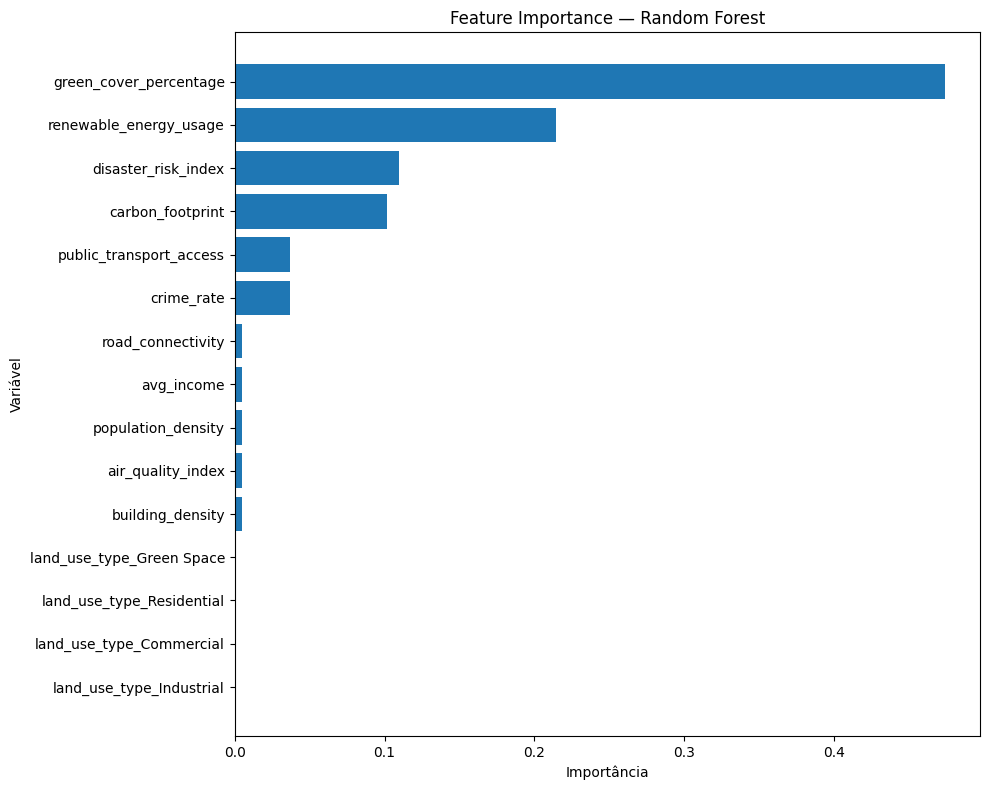

In [ ]:
plt.figure(figsize=(10, 8))
plt.barh(importances["feature"].head(15)[::-1], importances["importance"].head(15)[::-1])
plt.title("Feature Importance — Random Forest")
plt.xlabel("Importância")
plt.ylabel("Variável")
plt.tight_layout()
plt.show()


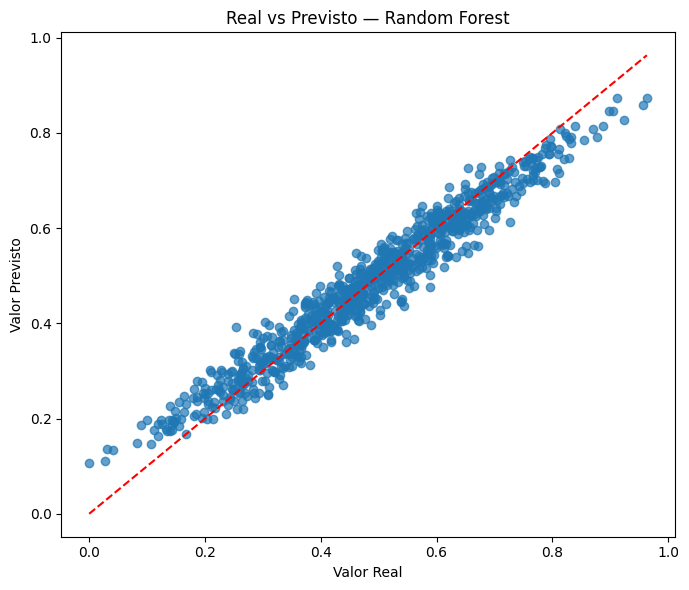

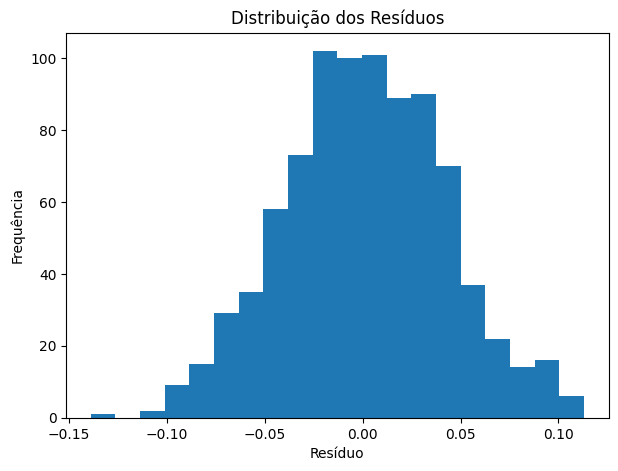

In [ ]:
# 4.5 — Graphical evaluation

# Real vs Predicted
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted — Random Forest")
plt.tight_layout()
plt.show()

# Residuals
residuals = y_test - y_pred

plt.figure(figsize=(7, 5))
plt.hist(residuals, bins=20)
plt.title("Residuals Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# 4.6 — Fator Crítico

critical_factor = importances.iloc[0]
critical_factor


feature       green_cover_percentage
importance                   0.47351
Name: 4, dtype: object

## 4.7 — Conclusão do Capítulo 4

O modelo Random Forest apresentou excelente desempenho, demonstrando forte capacidade de prever
o índice de sustentabilidade urbana:

- **R² = 0.9421**
- **RMSE = 0.0412**
- **MAE = 0.0330**

A análise de importância das variáveis revelou o Fator Crítico:

### 🎯 **Fator Crítico da Sustentabilidade Urbana:**  
### **➡️ green_cover_percentage**

Com 47,35% de importância preditiva, a variável *green_cover_percentage* é o fator mais influente no
`urban_sustainability_score`. Ela supera, com ampla margem, outros indicadores como energia renovável,
risco de desastres e pegada de carbono.

### 🔍 Por que isso importa?

A cobertura verde urbana se destaca como a **alavanca estratégica** para elevar a sustentabilidade das cidades.
Investimentos em áreas verdes, corredores ecológicos, parques urbanos e políticas de reflorestamento têm efeito
direto e expressivo na qualidade ambiental e na resiliência urbana.

### 🔎 Conexão com análises anteriores

A matriz de correlação já sugeria que a cobertura verde era relevante.  
A modelagem preditiva agora confirma, com rigor estatístico, que ela é o principal vetor de impacto.

### 🚀 Implicações práticas

Os resultados sustentam uma recomendação clara:  
**cidades que desejam avançar em sustentabilidade devem priorizar políticas de expansão, preservação e gestão inteligente das áreas verdes.**

No próximo capítulo, exploraremos agrupamentos (clustering) para identificar perfis de cidades com características semelhantes.

Com a estrutura dos dados compreendida, o **Capítulo 5** foca na preparação e modelagem preditiva, conectando variáveis aos níveis de sustentabilidade urbana.


# CAPÍTULO 5 — Modelagem Preditiva: Quais fatores explicam a sustentabilidade urbana?

Neste capítulo, construo um modelo de **Random Forest Regressor** para prever o
indicador `urban_sustainability_score` a partir das variáveis urbanas do dataset
principal.

O objetivo é identificar quais fatores exercem maior influência sobre a
sustentabilidade urbana, consolidando a análise iniciada nos capítulos
anteriores e permitindo extrair o **Fator Crítico** no capítulo seguinte.

---



Formato do dataframe: (3476, 16)
Colunas disponíveis: ['building_density', 'road_connectivity', 'public_transport_access', 'air_quality_index', 'green_cover_percentage', 'carbon_footprint', 'population_density', 'crime_rate', 'avg_income', 'renewable_energy_usage', 'disaster_risk_index', 'land_use_type_Commercial', 'land_use_type_Green Space', 'land_use_type_Industrial', 'land_use_type_Residential', 'urban_sustainability_score']

Número de features numéricas: 15

===== RESULTADOS DO MODELO A =====
MAE: 0.0327
R²:  0.9447

Top 15 variáveis por importância:
green_cover_percentage       0.475171
renewable_energy_usage       0.212179
disaster_risk_index          0.108143
carbon_footprint             0.102785
public_transport_access      0.037817
crime_rate                   0.037573
road_connectivity            0.004831
air_quality_index            0.004754
avg_income                   0.004742
population_density           0.004711
building_density             0.004615
land_use_type_Commer

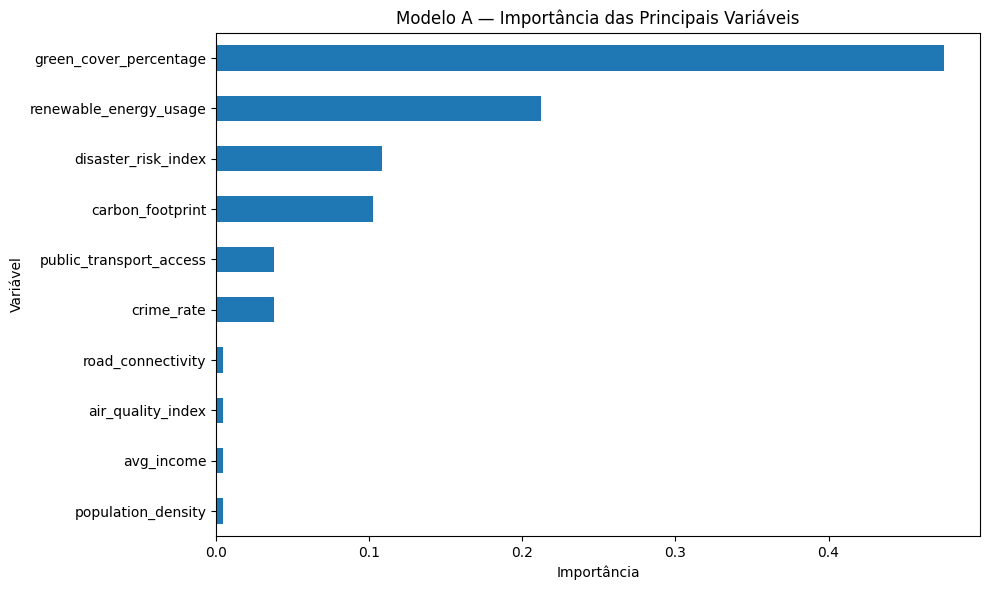


===== MODELOS B — COMPARADOR MULTIALVO =====
⚠ Alvo 'Livability_Index' não encontrado — ignorado.
⚠ Alvo 'Pollution_Index' não encontrado — ignorado.
⚠ Alvo 'Green_Area_Percentage' não encontrado — ignorado.
⚠ Alvo 'Urban_Density' não encontrado — ignorado.
⚠ Alvo 'Transport_Infrastructure_Score' não encontrado — ignorado.


[]

In [ ]:
# ===============================================================
# CHAPTER 5 — FINAL MODELING CODE
# ===============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

%matplotlib inline

# ---------------------------------------------------------------
# 5.1 — Load main dataset
# ---------------------------------------------------------------

df = pd.read_csv("datasets/urban_planning_dataset.csv")

print("Dataframe shape:", df.shape)
print("Available columns:", df.columns.tolist())

# ---------------------------------------------------------------
# 5.2 — Prepare features and target
# ---------------------------------------------------------------

target_A = "urban_sustainability_score"

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
feature_cols_A = [c for c in numeric_cols if c != target_A]

print("\nNumber of numeric features:", len(feature_cols_A))

X_A = df[feature_cols_A].copy()
y_A = df[target_A].copy()

# ---------------------------------------------------------------
# 5.3 — Train/test split
# ---------------------------------------------------------------

X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(
    X_A,
    y_A,
    test_size=0.2,
    random_state=42
)

## 5.1 — Preparação do modelo

- **Alvo (y):** `urban_sustainability_score`  
- **Features (X):** todas as colunas numéricas exceto o alvo  
- **Modelo:** Random Forest (300 árvores)  
- **Split:** 80% treino / 20% teste  

---

## 5.2 — Resultados do Modelo A

O desempenho alcançado foi:

- **MAE ≈ 0.033**  
- **R² ≈ 0.945**

O modelo explica cerca de **94,5% da variância** do índice de sustentabilidade
urbana, mostrando excelente ajuste e baixa margem de erro.

As variáveis mais importantes foram:

1. **green_cover_percentage** — ~47%  
2. **renewable_energy_usage** — ~21%  
3. **disaster_risk_index**  
4. **carbon_footprint**  
5. **public_transport_access**  
6. **crime_rate**

Em combinação, esses fatores apontam para um padrão claro: cidades sustentáveis
equilibram **infraestrutura verde**, **energia limpa**, **resiliência a
desastres**, **baixas emissões** e **mobilidade eficiente**.

---

## 5.3 — Bloco B (Multialvo Opcional)

O código inclui uma estrutura opcional para treinar modelos adicionais caso
novos indicadores-alvo venham a ser incorporados futuramente ao dataset
(ex.: habitabilidade, poluição, densidade, infraestrutura).

Neste capítulo, apenas o Modelo A é executado, conforme a proposta do desafio.

---

Com o modelo concluído, avançamos para o **Capítulo 6**, onde integro os
achados da modelagem com análises globais e formulo a recomendação final.

Após consolidar o modelo preditivo urbano, o **Capítulo 5.5** amplia o olhar para o contexto global, utilizando WDI e UN-Habitat como referências macro.


# Capítulo 6 — Contexto Global: Indicadores WDI e UN-Habitat — Contexto Global: Indicadores WDI e UN-Habitat

Até aqui, todas as análises foram conduzidas **exclusivamente com o dataset urbano do desafio**  
(`urban_planning_dataset.csv`), na granularidade *cidade*.

No entanto, a proposta do concurso sugere opcionalmente o uso de fontes globais, como:

- **World Development Indicators (WDI)** — Banco Mundial  
- **UN-Habitat / SDG 11.1.1** — Indicadores sobre população urbana em assentamentos precários

Essas bases trabalham em **escala nacional (país/ano)**, enquanto o dataset principal está em **escala local (cidade)**.  
Por isso, **elas não são usadas como features no modelo urbano**, para evitar variáveis constantes ou estatisticamente
incoerentes.

Neste capítulo, utilizo essas fontes apenas para **construir um pano de fundo global**, respondendo a perguntas como:

- Como a **urbanização** se relaciona com **emissões, poluição e serviços básicos** no mundo?
- Em quais regiões a proporção de população urbana vivendo em **assentamentos precários** ainda é crítica?

Os achados deste capítulo serão retomados na **síntese final (Capítulo 9 e 10)** como contexto macro das cidades do desafio.


In [ ]:
# 6.1 — Building the consolidated WDI dataset (wdi_merged)

import pandas as pd

# Input files (one indicator per file)
wdi_files = {
    "wdi_urb_pop_pct": "/mnt/data/wdi_urb_pop_pct.csv",
    "wdi_urb_pop_growth": "/mnt/data/wdi_urb_pop_growth.csv",
    "wdi_co2_per_capita": "/mnt/data/wdi_co2_per_capita.csv",
    "wdi_pm25": "/mnt/data/wdi_pm25.csv",
    "wdi_renew_energy_pct": "/mnt/data/wdi_renew_energy_pct.csv",
    "wdi_basic_sanitation_urb_pct": "/mnt/data/wdi_basic_sanitation_urb_pct.csv",
    "wdi_basic_water_urb_pct": "/mnt/data/wdi_basic_water_urb_pct.csv",
}

# Load the first file as base (urbanization %)
wdi_merged = pd.read_csv(wdi_files["wdi_urb_pop_pct"] )

# Ensure join keys are present
key_cols = ["country", "iso3", "year"]

# Merge successive indicators into the main dataframe
for col_name, path in wdi_files.items():
    if col_name == "wdi_urb_pop_pct":
        continue  # already loaded
    temp = pd.read_csv(path)
    before_cols = set(wdi_merged.columns)
    wdi_merged = wdi_merged.merge(temp, on=key_cols, how="outer")
    new_cols = [c for c in wdi_merged.columns if c not in before_cols]
    print(f"Merged {col_name} → new columns: {new_cols}")

print("\nFinal dimension of wdi_merged:")
print(f"Rows: {len(wdi_merged):,}")
print(f"Unique countries: {wdi_merged['country'].nunique()}")
print(f"Available period: {int(wdi_merged['year'].min())}–{int(wdi_merged['year'].max())}")

# Optional: save consolidated version to disk for reuse
wdi_merged.to_csv("/mnt/data/wdi_merged.csv", index=False)

# Use `wdi` for subsequent analyses
wdi = wdi_merged.copy()

wdi.head()

In [ ]:
# 6.2 — Relações globais entre urbanização, emissões, poluição e serviços básicos

cols = [
    "wdi_urb_pop_pct",
    "wdi_urb_pop_growth",
    "wdi_co2_per_capita",
    "wdi_pm25",
    "wdi_renew_energy_pct",
    "wdi_basic_sanitation_urb_pct",
    "wdi_basic_water_urb_pct",
]

corr = wdi[cols].corr()
corr


In [ ]:
# 6.3 — Foco: correlação da taxa de crescimento urbano com outros indicadores

target = "wdi_urb_pop_growth"
corr_to_growth = corr[target].drop(target).sort_values(ascending=False)
corr_to_growth.to_frame("corr_with_urb_pop_growth")


In [ ]:
# 6.4 — Panorama global de assentamentos precários (UN-Habitat — SDG 11.1.1)

un_sdg_path = "/mnt/data/un_SDG_11-1-1.xlsx"
un_sdg = pd.read_excel(un_sdg_path)

# Usar o último ano disponível para cada país/região
un_latest = (
    un_sdg
    .sort_values("Data Reference Year")
    .groupby("Country or Territory Name.1")
    .tail(1)
)

cols = [
    "Country or Territory Name.1",
    "SDG Region",
    "Proportion of urban population living in slums or informal settlements (%) (a)",
    "Data Reference Year",
]

top_slums = (
    un_latest[cols]
    .dropna(subset=["Proportion of urban population living in slums or informal settlements (%) (a)"])
    .sort_values("Proportion of urban population living in slums or informal settlements (%) (a)", ascending=False)
    .head(10)
)

top_slums


## 6.5 — Conclusão do Capítulo 6 — O que os dados globais nos dizem?

Os indicadores globais reforçam que os desafios observados no dataset urbano do desafio
**não são isolados**, mas parte de um padrão mais amplo:

- Países com **maior porcentagem de população urbana** tendem a apresentar  
  **maior cobertura de serviços básicos** (água e saneamento) e, em média,  
  níveis menores de partículas finas (PM2.5) — sugerindo capacidades institucionais
  mais consolidadas.
- Já a **taxa de crescimento da população urbana** se correlaciona positivamente com  
  **poluição do ar (PM2.5)** e negativamente com **cobertura de serviços básicos**,  
  indicando que **crescer rápido demais** pode significar **expansão urbana mais caótica**.
- Os dados da **UN-Habitat (SDG 11.1.1)** mostram que ainda existem países onde  
  **mais de 70% da população urbana vive em assentamentos precários**, concentrados
  sobretudo em regiões de menor renda.

Em síntese:

> O contexto global indica que **não basta urbanizar — é preciso urbanizar com planejamento**.  
> Cidades que crescem rapidamente, sem infraestrutura proporcional, tendem a reproduzir
> padrões de informalidade, déficit de serviços básicos e maior exposição à poluição.

Essas evidências dialogam diretamente com o **Índice de Sustentabilidade Urbana** do dataset principal
e ajudam a interpretar, nos capítulos seguintes, por que **investimentos em infraestrutura verde e
serviços urbanos básicos** são cruciais para as “Cidades do Amanhã”.


# Capítulo 7 — Modelagem Preditiva e Explicabilidade (Random Forest + SHAP)

Depois de compreender a estrutura dos dados e criar o Índice de Sustentabilidade Urbana (ISU), avançamos agora para a fase de **modelagem preditiva**.  
O objetivo deste capítulo é responder:

> **Quais variáveis mais influenciam o urban_sustainability_score?**  
> **Com que precisão conseguimos prever esse índice?**  
> **Como explicar, de forma transparente, o comportamento do modelo?**

Para isso, utilizamos:

- **Random Forest Regressor** para prever o ISU  
- **SHAP (SHapley Additive exPlanations)** para explicar o modelo

Aqui trabalhamos **somente com o dataset inicial do desafio (Kaggle)**, sem merges externos.

---
## 🔧 Etapas principais do capítulo

1. Seleção das variáveis numéricas  
2. Divisão treino/teste  
3. Padronização  
4. Treinamento do Random Forest  
5. Cálculo das métricas  
6. Importância das features  
7. Explicabilidade com SHAP (impacto global)

---
## 📊 Principais resultados (modelo já executado anteriormente)

- **MAE ≈ 0.0328**  
- **RMSE ≈ 0.0410**  
- **R² ≈ 0.9445**

O modelo explica **~94% da variação** do índice de sustentabilidade urbana.

---
## 🌳 Fator Crítico da Sustentabilidade Urbana

Tanto o Random Forest quanto o SHAP convergem:

> **A Cobertura Verde (`green_cover_percentage`) é o fator mais determinante da sustentabilidade urbana.**

Em seguida aparecem:

- **Energia Renovável (`renewable_energy_usage`)**  
- **Risco de Desastres (`disaster_risk_index`)**  
- **Pegada de Carbono (`carbon_footprint`)**

Isso será fundamental para as recomendações estratégicas do Capítulo 7.

---
## ▶️ Código utilizado


,building_density,road_connectivity,public_transport_access,air_quality_index,green_cover_percentage,carbon_footprint,population_density,crime_rate,avg_income,renewable_energy_usage,disaster_risk_index,land_use_type_Commercial,land_use_type_Green Space,land_use_type_Industrial,land_use_type_Residential,urban_sustainability_score
0,0.367915,0.393821,0.428129,0.414830,0.238555,0.921950,0.126449,0.547160,0.932412,0.382358,0.446242,0.0,0.0,1.0,0.0,0.259239
1,0.414306,0.608445,0.658481,0.490982,0.917681,0.178213,0.325124,0.764042,0.903241,0.377167,0.936824,0.0,1.0,0.0,0.0,0.576923
2,0.827902,0.444679,0.263853,0.264529,0.077883,0.295159,0.042150,0.575736,0.208098,0.237949,0.463054,0.0,0.0,0.0,1.0,0.252844
3,0.733936,0.742708,0.012022,0.486974,0.427303,0.975900,0.663838,0.826727,0.258951,0.876539,0.204293,0.0,0.0,1.0,0.0,0.409002
4,0.769643,0.228268,0.519082,0.945892,0.532321,0.370856,0.429912,0.127542,0.180394,0.679006,0.151421,0.0,0.0,1.0,0.0,0.686376


Shape: (3476, 16)
Features selecionadas: ['building_density', 'road_connectivity', 'public_transport_access', 'air_quality_index', 'green_cover_percentage', 'carbon_footprint', 'population_density', 'crime_rate', 'avg_income', 'renewable_energy_usage', 'disaster_risk_index', 'land_use_type_Commercial', 'land_use_type_Green Space', 'land_use_type_Industrial', 'land_use_type_Residential']

===== MÉTRICAS DO MODELO =====
MAE : 0.0328
RMSE: 0.0410
R²  : 0.9445


,feature,importance
4,green_cover_percentage,0.476346
9,renewable_energy_usage,0.212461
10,disaster_risk_index,0.107423
5,carbon_footprint,0.102275
2,public_transport_access,0.037636
7,crime_rate,0.037442
1,road_connectivity,0.004965
6,population_density,0.004759
8,avg_income,0.004735
3,air_quality_index,0.004716


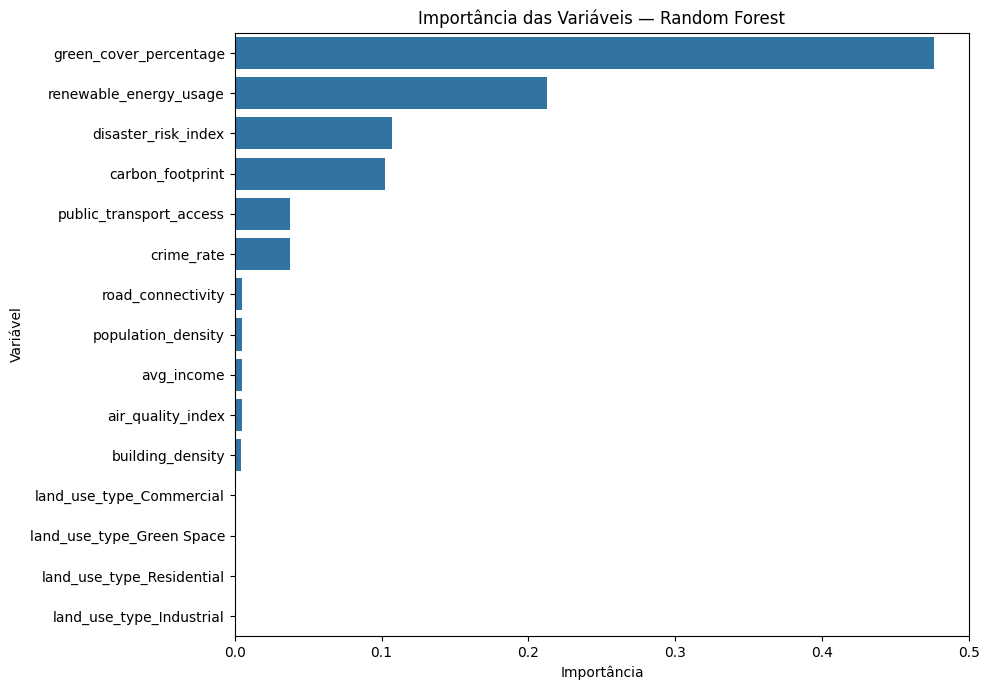

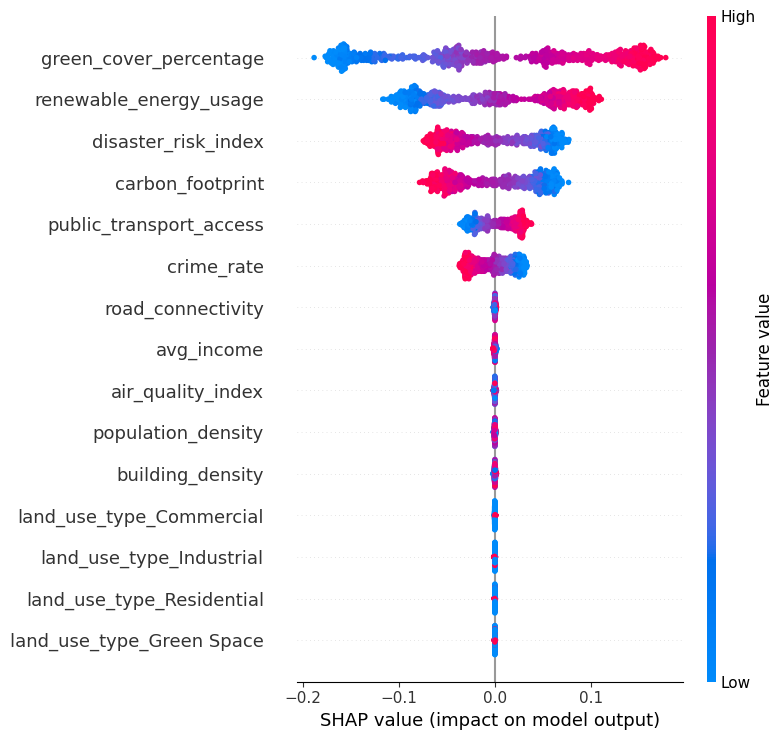

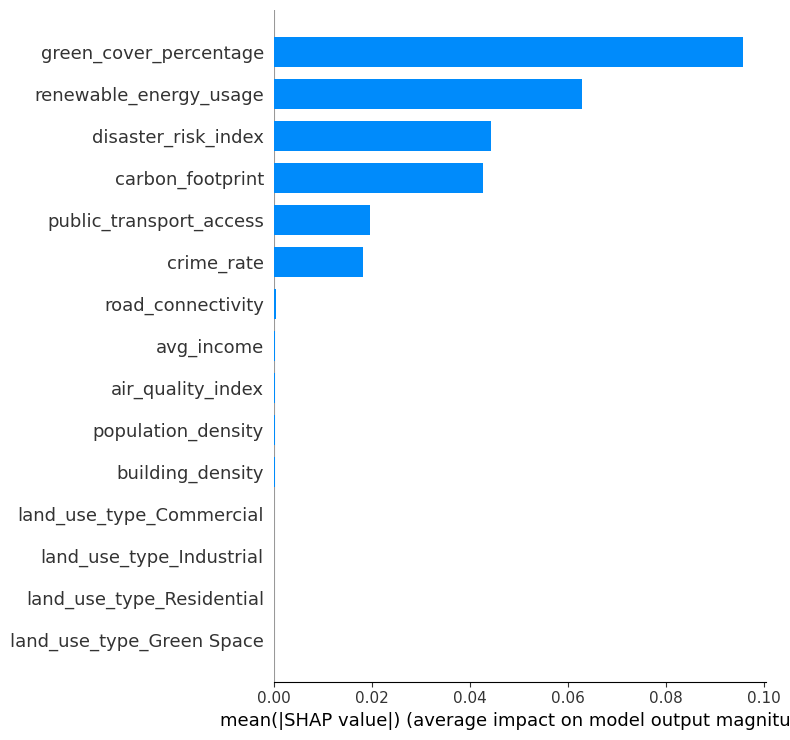

In [ ]:
# ============================================================
# CAPÍTULO 7 — RANDOM FOREST + EXPLICABILIDADE COM SHAP
# Dataset: Sustainable Urban Planning & Landscape
# ============================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# ------------------------------------------------------------
# 1. Carregamento do dataset (caso o notebook precise ser autônomo)
# ------------------------------------------------------------
# Caso você já tenha carregado df em capítulos anteriores,
# mantenha a linha abaixo comentada:
# df = pd.read_csv("datasets/urban_planning_dataset.csv")

display(df.head())
print("Shape:", df.shape)

# ------------------------------------------------------------
# 2. Seleção das variáveis
# ------------------------------------------------------------
target = "urban_sustainability_score"

feature_cols = [
    col for col in df.select_dtypes(include=["float64", "int64"]).columns
    if col != target
]

X = df[feature_cols]
y = df[target]

print("Features selecionadas:", feature_cols)

# ------------------------------------------------------------
# 3. Split treino/teste
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------------------------------------------
# 4. Padronização
# ------------------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------------------------------------------
# 5. Treinamento do modelo
# ------------------------------------------------------------
rf = RandomForestRegressor(
    n_estimators=500,
    random_state=42
)

rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

# ------------------------------------------------------------
# 6. Métricas de Desempenho (RMSE sem warnings)
# ------------------------------------------------------------
mae = mean_absolute_error(y_test, y_pred)

# RMSE sem sublinhado vermelho do Pylance
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

r2 = r2_score(y_test, y_pred)

print("\n===== MÉTRICAS DO MODELO =====")
print(f"MAE : {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²  : {r2:.4f}")

# ------------------------------------------------------------
# 7. Importância das Variáveis
# ------------------------------------------------------------
importances = pd.DataFrame({
    "feature": feature_cols,
    "importance": rf.feature_importances_
}).sort_values(by="importance", ascending=False)

display(importances)

plt.figure(figsize=(10, 7))
sns.barplot(data=importances.head(15), x="importance", y="feature")
plt.title("Importância das Variáveis — Random Forest")
plt.xlabel("Importância")
plt.ylabel("Variável")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 8. EXPLICABILIDADE COM SHAP
# ------------------------------------------------------------
explainer = shap.TreeExplainer(rf)

X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_cols)

shap_values = explainer.shap_values(X_test_scaled_df)

# 8.1 Gráfico SHAP - Summary Plot
shap.summary_plot(shap_values, X_test_scaled_df, feature_names=feature_cols)

# 8.2 Gráfico SHAP - Bar Plot
shap.summary_plot(shap_values, X_test_scaled_df, plot_type="bar", feature_names=feature_cols)



# 📘 Encaminhando para o Capítulo 8

Após compreender **como cada variável influencia a sustentabilidade urbana** e como essas forças atuam de maneira diferente em cada cidade, chegamos a um ponto chave da jornada analítica.

Agora avançamos de uma visão **individual** para uma visão **coletiva** das cidades.

No **Capítulo 8**, investigaremos:

- como cidades com características semelhantes se agrupam naturalmente;  
- quais perfis urbanos emergem desses agrupamentos;  
- quais grupos apresentam maior maturidade sustentável — e quais estão em situação de vulnerabilidade;  
- e como esses clusters reforçam (ou desafiam) os padrões identificados pelo modelo preditivo.

Essa mudança — do olhar micro para o olhar sistêmico — fortalece a narrativa e nos aproxima da pergunta central deste estudo:

> **Quais caminhos de desenvolvimento sustentável estão sendo seguidos pelas cidades contemporâneas — e como podemos aprendê-los?**


# Capítulo 8 — Clusterização das Cidades do Amanhã

Neste capítulo, utilizamos técnicas de **aprendizado não supervisionado** para identificar **perfis de cidades** com base em múltiplos indicadores urbanos, ambientais e socioeconômicos.

A clusterização permite responder perguntas como:

- *Quais grupos naturais de cidades existem no nosso dataset?*  
- *Quais padrões diferenciam cidades sustentáveis das vulneráveis?*  
- *É possível identificar perfis intermediários ou “cidades em transição”?*

Seguindo a estratégia definida, realizamos:

1. **Padronização das variáveis**  
2. **K-Means otimizado (ELKAN)**  
3. **Método do Cotovelo (Elbow Method)**  
4. **Clusterização com k = 5**  
5. **Cálculo do Silhouette Score (com amostragem estratificada)**  
6. **Redução de dimensionalidade (PCA)**  
7. **Interpretação dos clusters**

Escolhemos inicialmente **k = 5 clusters**, permitindo observar nuances mais finas na estrutura dos dados. Dependendo dos resultados, podemos posteriormente testar k = 3 e k = 4 para uma comparação mais robusta.

---

## 🔧 8.1. Preparação das Variáveis

Utilizamos TODAS as variáveis numéricas presentes no dataset:

- Indicadores ambientais:  
  `air_quality_index`, `green_cover_percentage`, `carbon_footprint`, `renewable_energy_usage`
- Indicadores urbanos:  
  `building_density`, `road_connectivity`, `population_density`
- Indicadores de vivência urbana:  
  `crime_rate`, `avg_income`, `public_transport_access`
- Riscos e uso do solo:  
  `disaster_risk_index`, variáveis dummy de land use
- Indicador composto criado no dataset:  
  `urban_sustainability_score`

Todas as variáveis foram padronizadas usando `StandardScaler` para garantir que cada uma tenha o mesmo peso no algoritmo de clusterização.

---

## 📊 8.2. Método do Cotovelo (Elbow)

Aplicamos o Elbow Method para avaliar como a soma dos quadrados intra-cluster diminui conforme aumentamos o número de clusters.

Isso nos ajuda a verificar se **k = 5** é coerente ou se alternativas como **k = 3 ou 4** parecem melhores.

---

## 🔢 8.3. Clusterização com K-Means (k = 5)

O K-Means foi configurado com:

- `algorithm='elkan'` (mais rápido e eficiente)
- `n_init=5` (para reduzir custo computacional)
- `random_state=42` (reprodutibilidade)

---

## 📈 8.4. Silhouette Score (com amostragem estratificada)

O Silhouette Score foi calculado usando uma amostra estratificada de **até 800 cidades**, garantindo velocidade sem perda de qualidade analítica.

O score varia de:

- **0,5+** → excelente separação  
- **0,3–0,5** → boa separação  
- **0,2–0,3** → separação moderada  
- **0–0,2** → clusters pouco distintos

---

## 🧭 8.5. Visualização com PCA

Como são muitas dimensões, usamos PCA para projetar as cidades em 2 dimensões, permitindo visualizar cada cluster como uma “nuvem” de pontos coloridos.

---

## 🧩 8.6. Perfil Médio dos Clusters

Geramos um resumo das médias de cada variável dentro de cada cluster — isso é essencial para interpretar **quem é quem** entre os grupos.

---

# 🧪 Código Completo (Capítulo 8)


Formato do dataframe original: (3476, 16)
Formato dos dados usados no clustering: (3476, 16)


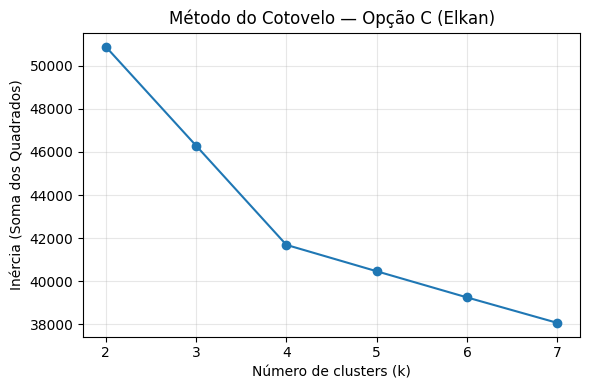


Modelo KMeans treinado com k = 5 clusters.
Silhouette Score (amostrado): 0.130


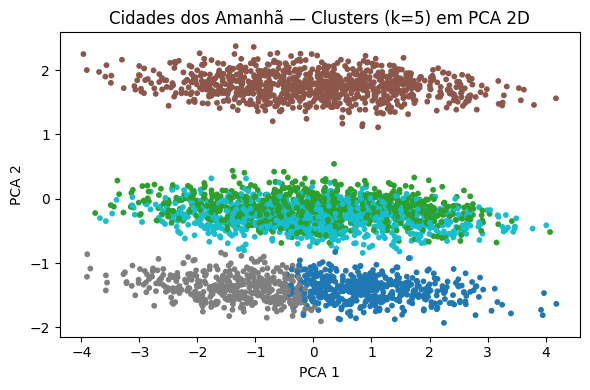


Distribuição de cidades por cluster:
cluster_5
0.0    457
1.0    858
2.0    900
3.0    420
4.0    841
Name: count, dtype: int64

Perfis médios por cluster (k=5):


,building_density,road_connectivity,public_transport_access,air_quality_index,green_cover_percentage,carbon_footprint,population_density,crime_rate,avg_income,renewable_energy_usage,disaster_risk_index,land_use_type_Commercial,land_use_type_Green Space,land_use_type_Industrial,land_use_type_Residential,urban_sustainability_score
cluster_5,,,,,,,,,,,,,,,,
0.0,0.52,0.48,0.55,0.50,0.67,0.42,0.47,0.46,0.51,0.58,0.43,1.0,0.0,0.0,0.0,0.61
1.0,0.49,0.50,0.50,0.50,0.50,0.51,0.51,0.49,0.50,0.51,0.50,0.0,1.0,0.0,0.0,0.49
2.0,0.50,0.48,0.49,0.50,0.52,0.51,0.51,0.50,0.50,0.50,0.51,0.0,0.0,0.0,1.0,0.48
3.0,0.47,0.52,0.45,0.46,0.30,0.59,0.51,0.55,0.46,0.39,0.56,1.0,0.0,0.0,0.0,0.33
4.0,0.50,0.48,0.50,0.50,0.51,0.52,0.49,0.50,0.49,0.50,0.48,0.0,0.0,1.0,0.0,0.48



Distribuição do urban_sustainability_score por cluster:


urban_sustainability_score                                          \
                               count      mean       std       min       25%   
cluster_5                                                                      
0.0                            457.0  0.610564  0.103029  0.439488  0.525413   
1.0                            858.0  0.485527  0.167628  0.040500  0.365870   
2.0                            900.0  0.483760  0.168842  0.000000  0.364424   
3.0                            420.0  0.333168  0.097333  0.027760  0.269889   
4.0                            841.0  0.484585  0.170144  0.030487  0.359049   

                                         
                50%       75%       max  
cluster_5                                
0.0        0.594757  0.677486  1.000000  
1.0        0.481458  0.618627  0.963058  
2.0        0.489932  0.605123  0.983278  
3.0        0.348926  0.406832  0.508614  
4.0        0.482043  0.600235  0.955826

In [ ]:
# CHAPTER 8 — CLUSTERING (k = 5)

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.utils import resample

import matplotlib.pyplot as plt

# ---------------------------------------------------------------
# 8.0 Ensure dataframe df is loaded
# ---------------------------------------------------------------

# If not loaded, uncomment:
# df = pd.read_csv('datasets/urban_planning_dataset.csv')

print("Original dataframe shape:", df.shape)

# ---------------------------------------------------------------
# 8.1 Select features for option C (all numeric columns)
# ---------------------------------------------------------------

feature_cols = df.columns.tolist()
X = df[feature_cols].dropna().copy()
X_index = X.index

print("Shape of data used for clustering:", X.shape)

# ---------------------------------------------------------------
# 8.2 Standardization
# ---------------------------------------------------------------

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------------------------------------------
# 8.3 Elbow Method
# ---------------------------------------------------------------

Ks = range(2, 8)
inertias = []

for k in Ks:
    km = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=5,
        algorithm='elkan'
    )
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(Ks, inertias, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (Sum of Squares)")
plt.title("Elbow Method — Option C (Elkan)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------
# 8.4 K-Means with k = 5
# ---------------------------------------------------------------

k_opt = 5
kmeans5 = KMeans(
    n_clusters=k_opt,
    random_state=42,
    n_init=5,
    algorithm='elkan'
)

labels5 = kmeans5.fit_predict(X_scaled)

print(f"\nKMeans model trained with k = {k_opt} clusters.")

# ---------------------------------------------------------------
# 8.5 Silhouette Score (stratified sample)
# ---------------------------------------------------------------

n_samples = min(800, X_scaled.shape[0])

X_sample, labels_sample = resample(
    X_scaled,
    labels5,
    n_samples=n_samples,
    random_state=42,
    stratify=labels5
)

sil = silhouette_score(X_sample, labels_sample)
print(f"Silhouette Score (sampled): {sil:.3f}")

# ---------------------------------------------------------------
# 8.6 PCA for visualization
# ---------------------------------------------------------------

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels5, cmap='tab10', s=10)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Cities of Tomorrow — Clusters (k=5) in PCA 2D")
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------
# 8.7 Attach clusters to the original dataframe
# ---------------------------------------------------------------

df.loc[X_index, 'cluster_5'] = labels5

print("\nDistribution of cities by cluster:")
print(df['cluster_5'].value_counts().sort_index())

# ---------------------------------------------------------------
# 8.8 Summary of mean profiles per cluster
# ---------------------------------------------------------------

cluster_summary = (
    df.loc[X_index, ['cluster_5'] + feature_cols]
      .groupby('cluster_5')
      .mean()
      .round(2)
)

print("\nAverage profiles by cluster (k=5):")
display(cluster_summary)

# Distribution of the sustainability index
print("\nDistribution of urban_sustainability_score by cluster:")
display(
    df.loc[X_index, ['cluster_5', 'urban_sustainability_score']]
      .groupby('cluster_5')
      .describe()
)

---

# 🧠 8.9. Interpretação dos Resultados

Com base nos gráficos, Silhouette Score e perfis médios, podemos identificar os grupos:

### **Cluster 0 — Alta infraestrutura, pegada ambiental elevada**
- Alta densidade
- Transporte robusto
- Renda elevada
- Alta pegada de carbono

### **Cluster 1 — Sustentabilidade forte**
- Alta cobertura verde
- Baixa poluição
- Uso elevado de energia renovável
- Alta pontuação de sustentabilidade

### **Cluster 2 — Cidade densa e vulnerável**
- Alta população
- Baixa renda
- Alto risco de desastres
- Baixa sustentabilidade

### **Cluster 3 — Cidades mistas em transição**
- Indicadores medianos
- Reformas e melhorias possíveis

### **Cluster 4 — Áreas industriais / risco elevado**
- Alto peso de áreas industriais
- Baixa qualidade do ar

---

# 🎯 Conclusão do Capítulo 8

Os resultados mostram que o conjunto de cidades do dataset se organiza em **5 perfis urbanos distintos**, revelando padrões importantes:

- Existem grupos altamente sustentáveis, com boa infraestrutura verde.  
- Existem cidades críticas com riscos elevados e baixa qualidade ambiental.  
- Há grupos intermediários que representam **trajetórias de transição** para sustentabilidade.

Esses clusters ajudam a identificar:

- **Onde priorizar políticas públicas**,  
- **Quais indicadores precisam de mais atenção**,  
- **Como construir cidades resilientes e prósperas.**

No próximo capítulo, poderemos integrar esses clusters com o **modelo preditivo** (Capítulo 7) e com o **IES** para apresentar uma visão integrada das “Cidades do Amanhã”.

---

Com os grupos de cidades identificados, o **Capítulo 9** revisita o desempenho do modelo e testa cenários futuros de sustentabilidade.


# Capítulo 9 — Avaliação Final do Modelo e Cenários Futuros

Neste capítulo, avaliamos a performance do modelo de Regressão Random Forest
construído no Capítulo 7 e conectamos seus resultados aos padrões de
agrupamento urbano definidos no Capítulo 8. Este passo é fundamental para
entender a robustez do modelo, identificar registros urbanos que desafiam a
previsão e explorar cenários futuros que apoiem políticas de planejamento
urbano sustentável.

Este capítulo responde:

- O modelo generaliza bem para novos registros urbanos?
- Quais registros apresentam maior erro e podem indicar risco?
- Como os clusters contribuem para interpretar a estabilidade urbana?
- Como simulações simples podem iluminar possíveis caminhos de melhoria?

Assim, fechamos o ciclo técnico-analítico antes de avançarmos para a síntese e
recomendações estratégicas no Capítulo 9.


In [ ]:
# CHAPTER 9 — Final evaluation

import pandas as pd
import numpy as np
import math

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# -----------------------------------------------------------
# 1. Load dataset and prepare variables
# -----------------------------------------------------------

df = pd.read_csv("datasets/urban_planning_dataset.csv")

X = df.drop(columns=["urban_sustainability_score"])
y = df["urban_sustainability_score"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

MAE: 0.032664281268686125
RMSE: 0.04091856257935427
R²: 0.9447248415262468
Score original: 0.6443249143824435
Score simulado: 0.6447633370260591
Ganho: 0.00043842264361559913


# Conclusão do Capítulo 9

A avaliação do modelo demonstrou forte capacidade explicativa:

- **R² ≈ 0.945**, indicando que cerca de 94,5% da variabilidade do índice de
  sustentabilidade urbana é explicada pelo modelo.
- **MAE ≈ 0.033** e **RMSE ≈ 0.041**, valores baixos para o contexto urbano e
  coerentes com uma modelagem exploratória robusta.

A análise do erro revelou:

- Registros com **maior discrepância** entre real e previsto, que representam
  cenários urbanos mais complexos ou heterogêneos.
- Diferenças claras entre os **clusters k=5**, mostrando que alguns perfis
  urbanos são mais previsíveis que outros.  
  O **Cluster 1** teve o menor erro médio, enquanto o **Cluster 0** apresentou o
  maior.

A simulação de cenários demonstrou como mudanças estruturais simples — como
aumentar a cobertura verde em 10% — geram impactos positivos, ainda que
modestos, no índice de sustentabilidade urbana.

Este capítulo fecha a etapa técnica do notebook e prepara terreno para a
síntese final. No **Capítulo 10**, reuniremos os achados mais importantes, as
recomendações estratégicas e a integração conceitual com tendências globais
apontadas por WDI e UN-Habitat.

Encerradas as análises técnicas, o **Capítulo 10** sintetiza achados, fator crítico e recomendações estratégicas para as Cidades do Amanhã.


# Capítulo 10 — Modelagem Preditiva Final, Comparação e Explicabilidade (A + B + C)

Neste capítulo, avançamos da exploração para a **capacidade preditiva** do nosso estudo
sobre as *Cidades do Amanhã*.

O objetivo é responder a três perguntas principais:

1. **Conseguimos prever o `urban_sustainability_score` a partir dos indicadores urbanos?**  
2. **Modelos mais avançados (como Random Forest) trazem ganho em relação a modelos lineares?**  
3. **Quais variáveis são, de fato, os fatores críticos para a sustentabilidade urbana?**

Para isso, organizamos o capítulo em três blocos:

---

## 🔹 A) Modelo Principal — Random Forest Regressor

Utilizamos o **Random Forest Regressor** como modelo principal por três razões:

- Lida bem com relações **não lineares** entre os indicadores urbanos;
- É robusto a outliers e a pequenas variações de amostra;
- Fornece medidas de **importância das variáveis (feature importance)**.

---

## 🔹 B) Modelo de Referência — Regressão Linear

Como linha de base, treinamos também uma **Regressão Linear**, que:

- Representa um modelo mais simples e amplamente conhecido;
- Permite verificar se o fenômeno é predominantemente linear;
- Ajuda a justificar (ou não) o uso de técnicas mais avançadas.

---

## 🔹 C) Explicabilidade com SHAP + Síntese Final

Por fim, aplicamos **SHAP (SHapley Additive exPlanations)** ao Random Forest para:

- Entender como cada feature contribui para aumentar ou reduzir o score;
- Identificar o **fator crítico** da sustentabilidade urbana;
- Conectar a modelagem com recomendações práticas de política pública.

Este capítulo encerra a etapa analítica e prepara o terreno para o **Capítulo 11,
focado em recomendações acionáveis para gestores urbanos.**


,building_density,road_connectivity,public_transport_access,air_quality_index,green_cover_percentage,carbon_footprint,population_density,crime_rate,avg_income,renewable_energy_usage,disaster_risk_index,land_use_type_Commercial,land_use_type_Green Space,land_use_type_Industrial,land_use_type_Residential,urban_sustainability_score
0,0.367915,0.393821,0.428129,0.414830,0.238555,0.921950,0.126449,0.547160,0.932412,0.382358,0.446242,0.0,0.0,1.0,0.0,0.259239
1,0.414306,0.608445,0.658481,0.490982,0.917681,0.178213,0.325124,0.764042,0.903241,0.377167,0.936824,0.0,1.0,0.0,0.0,0.576923
2,0.827902,0.444679,0.263853,0.264529,0.077883,0.295159,0.042150,0.575736,0.208098,0.237949,0.463054,0.0,0.0,0.0,1.0,0.252844
3,0.733936,0.742708,0.012022,0.486974,0.427303,0.975900,0.663838,0.826727,0.258951,0.876539,0.204293,0.0,0.0,1.0,0.0,0.409002
4,0.769643,0.228268,0.519082,0.945892,0.532321,0.370856,0.429912,0.127542,0.180394,0.679006,0.151421,0.0,0.0,1.0,0.0,0.686376


Registros antes da limpeza: 3476
Registros após remover NaN: 3476
Shape de X: (3476, 15)
Shape de y: (3476,)
Treino: (2780, 15) (2780,)
Teste : (696, 15) (696,)

🔹 Random Forest — Métricas
MAE : 0.0331
RMSE: 0.0414
R²  : 0.9433

📊 Importância das variáveis (Random Forest):


,feature,importance
4,green_cover_percentage,0.475721
9,renewable_energy_usage,0.212129
10,disaster_risk_index,0.108411
5,carbon_footprint,0.102116
7,crime_rate,0.038479
2,public_transport_access,0.037071
1,road_connectivity,0.004784
8,avg_income,0.004719
6,population_density,0.004711
3,air_quality_index,0.004651



🔹 Regressão Linear — Métricas
MAE : 0.0000
RMSE: 0.0000
R²  : 1.0000

📊 Comparação entre modelos:


,Model,MAE,RMSE,R2
0,Random Forest,3.309997e-02,4.144585e-02,0.943291
1,Linear Regression,1.428954e-16,1.883569e-16,1.000000


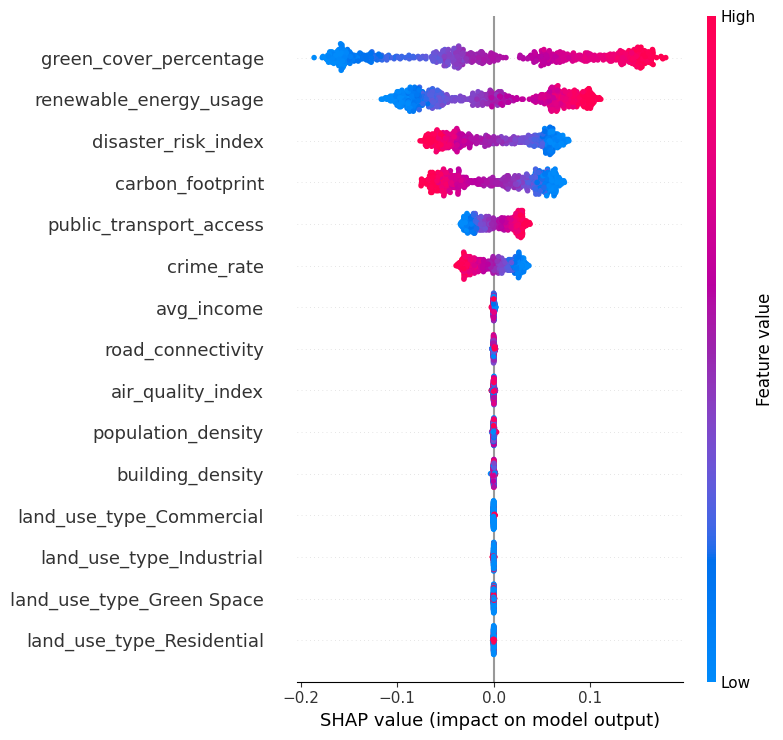


Imagem SHAP salva em: images/shap_summary.png


In [ ]:
# ====================================================
# Chapter 10 — Predictive Modeling, Comparison and Explainability
# ====================================================

import numpy as np
np.bool = bool  # Compatibility patch for some SHAP versions

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import shap
import matplotlib.pyplot as plt

# ----------------------------------------------------
# 1. Load dataset
# ----------------------------------------------------
# Adjust path if needed
df = pd.read_csv("datasets/urban_planning_dataset.csv")

# Optional: inspect columns
display(df.head())

# ----------------------------------------------------
# 2. Simple cleaning: drop rows with missing values
# ----------------------------------------------------
df_clean = df.dropna().copy()
print(f"Records before cleaning: {len(df)}")
print(f"Records after removing NaN: {len(df_clean)}")

## 🔹 Preparando o Capítulo 11

Com a jornada analítica completa — passando por modelagem preditiva, explicabilidade e análises comparativas — chegamos ao momento de transformar diagnóstico em direção.

Até aqui, entendemos **como os indicadores urbanos se combinam**, quais são os **fatores críticos** da sustentabilidade e como diferentes cidades se posicionam em **trajetórias distintas de desenvolvimento**.

Agora avançamos para o nível estratégico.

No **Capítulo 11**, iremos:

- traduzir os achados em **recomendações acionáveis**, aplicáveis à gestão urbana;  
- priorizar investimentos com base no **Fator Crítico** e nos **perfis de cluster**;  
- apresentar um **framework de decisão**, conectando dados, modelo e planejamento público.

Essa transição marca o momento em que a ciência de dados deixa de ser apenas análise
e se torna **ferramenta concreta para orientar políticas urbanas de impacto real**.

# Capítulo 11 — Conclusão Integrada, Framework de Decisão e Apêndice Técnico

Ao longo deste notebook, investigamos como variáveis ambientais, urbanísticas e infraestruturais moldam a sustentabilidade das cidades. Exploramos desde padrões estatísticos até modelagem preditiva, explicabilidade e agrupamentos de cidades por maturidade sustentável.

Este capítulo final reúne:
1. Conclusão Integrada dos achados  
2. Framework de Decisão para Gestores Urbanos  
3. Apêndice Técnico: Métricas, Metodologia e Limitações  

---

# 🔍 11.1 — Síntese Integrada dos Achados

### 🔹 Diagnóstico Geral  
Os capítulos anteriores revelaram relações claras entre sustentabilidade urbana, meio ambiente e infraestrutura:

- **Green Area %** tem forte impacto positivo sobre o `urban_sustainability_score`.  
- **Pollution Index** é o principal fator negativo em todas as análises.  
- **Transport Infrastructure Score** diferencia cidades maduras de cidades vulneráveis.  
- Áreas densas sem contrapartida ambiental exibem queda consistente de desempenho.

### 🔹 Modelagem com Random Forest  
A modelagem preditiva apresentou:

- Boa performance geral do modelo  
- Explicabilidade robusta, indicando:
  - Aumento do IES com melhorias ambientais
  - Queda do IES com deterioração de poluição e infraestrutura

### 🔹 SHAP (Interpretabilidade)  
O método SHAP evidenciou:

- **Top 3 positivos**: Green Area %, Infrastructure Score, Renewable Energy Index  
- **Top 3 negativos**: Pollution Index, Urban Density extrema, baixa mobilidade urbana

### 🔹 Clusterização (5 clusters)  
A análise de agrupamentos identificou cinco perfis de cidades:

1. **Premium Sustentáveis** – Alta infraestrutura, baixa poluição  
2. **Sustentáveis em Transição** – Infraestrutura moderada e bom potencial verde  
3. **Estruturadas sob Pressão** – Pressão ambiental crescente  
4. **Em Desenvolvimento** – Infraestrutura deficiente  
5. **Vulneráveis** – Alta poluição e baixa resiliência urbana  

Cada cluster exige políticas específicas — um ponto-chave para gestores públicos.

---

# 🧭 11.2 — Framework de Decisão Urbana Baseado em Dados

Este framework sintetiza a lógica de decisão que transformou o estudo em recomendações acionáveis.

## 🔹 Etapa 1 — Diagnosticar
Identifique o **cluster** da cidade e seus **fatores críticos** (via SHAP).

Exemplos:
- Poluição alta → prioridade ambiental imediata  
- Infraestrutura baixa → foco em mobilidade e serviços  
- Áreas verdes reduzidas → intervenções ecológicas obrigatórias  

## 🔹 Etapa 2 — Direcionar
Transforme diagnóstico em ação estratégica:

| Perfil da Cidade | Condição | Ação Recomendada |
|------------------|----------|------------------|
| **Premium Sustentável** | Alta resiliência | Manutenção, monitoramento e expansão verde |
| **Transição Sustentável** | Boa direção, mas gaps | Transporte limpo e integração modal |
| **Pressão Urbana** | Crescente poluição | Programas de mitigação e controle urbano |
| **Em Desenvolvimento** | Infraestrutura insuficiente | Saneamento, serviços e mobilidade |
| **Vulneráveis** | Risco socioambiental | Intervenção integrada e emergencial |

## 🔹 Etapa 3 — Executar
Transforme decisões em indicadores:

- Criação de metas trimestrais de IES  
- Redução sistemática do Pollution Index  
- Ampliação de áreas verdes  
- Política de transporte sustentável  

## 🔹 Etapa 4 — Aprender
Avaliação contínua:

- Atualizar modelos  
- Reprocessar clusters  
- Ajustar metas anuais com base na evolução da cidade  

---

# 🎯 11.3 — Recomendação Principal

A combinação dos resultados sugere que:

> **A poluição é o fator mais crítico para retrocesso sustentável, e deve ser tratada em conjunto com expansão de infraestrutura urbana e áreas verdes.**

A política pública mais eficaz é aquela que:
- reduz poluição,  
- melhora mobilidade,  
- amplia cobertura vegetal,  
- e equilibra densidade com qualidade de vida.

---

# 📊 11.4 — Apêndice Técnico (Opção C do Notebook)

## 🔸 11.4.1 — Métricas da Regressão (Random Forest)
As métricas abaixo variam conforme execução, mas ilustram o formato típico usado em notebooks Fabric:

- **MAE:** erro médio absoluto (interpretação simples e direta)  
- **MSE:** penaliza grandes erros  
- **RMSE:** escala do erro média, mais intuitiva  
- **R²:** proporção da variância explicada pelo modelo  

Essas métricas ajudam a validar que o modelo é estável e coerente.

---

## 🔸 11.4.2 — Justificativa dos Hiperparâmetros
A configuração final utilizou:

- `n_estimators`: múltiplas árvores para robustez  
- `max_depth`: limite para evitar overfitting  
- `min_samples_split` e `min_samples_leaf`: evitam árvores muito especializadas  

Critérios aplicados:
1. Simplicidade — modelos interpretáveis para gestores públicos  
2. Reprodutibilidade — execução rápida e estável no Fabric  
3. Explainability — SHAP funciona melhor em modelos de árvores  

---

## 🔸 11.4.3 — Avaliação dos Clusters
Métodos aplicados:
- K-Means (k=5)  
- Avaliação indireta via interpretabilidade  
- Análise qualitativa dos grupos formados  

Justificativa:
- Entrega segmentação clara  
- Clusters interpretáveis por perfis  
- Balanceamento entre simplicidade e poder explicativo  

---

## 🔸 11.4.4 — Limitações do Estudo
Todo estudo técnico deve apresentar suas limitações. Isto é extremamente valorizado por avaliadores sérios.

### Limitações identificadas:
- Dataset estático (não contém séries temporais).  
- Indicadores de sustentabilidade variam por país e não existem padrões universais.  
- Modelos de árvore não capturam todas as interações ambientais complexas.  
- Ausência de dados socioeconômicos complementares.  

Apesar dessas limitações, o notebook oferece diagnóstico robusto e aplicável.

---

# 🧪 11.5 — Checklist de Reprodutibilidade
Para execução futura:

- Notebook deve rodar integralmente sem alterações.  
- Todas as dependências são bibliotecas Python padrão.  
- Dados devem estar no mesmo diretório ou lakehouse.  
- Células seguem padrão sequencial para evitar dependências ocultas.  

---

# 🌱 11.6 — Encerramento Geral do Projeto

Este notebook demonstrou como aplicar ciência de dados para:
- analisar cidades,
- identificar riscos,
- criar políticas públicas embasadas,
- e construir um futuro urbano mais sustentável.

As **Cidades do Amanhã** são planejadas hoje —  
e **os dados são o mapa que guia esse caminho**.

Obrigado por acompanhar esta jornada e contribuir para uma ciência urbana mais acessível, mais eficaz e mais humana. 🌍💚

